In [ ]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

import pandas as pd;
from scipy.stats import zscore


import numpy as np
import torch as torch;
import torchvision.datasets as datasets
import torchvision.models as models
from torchvision import transforms

import torch.nn as nn;
import torch.nn.functional as F;

np.random.seed(42)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


#read in the dataset, convert to numpy

num_classes=10;

transform = transforms.Compose(
        [transforms.ToTensor(),
         transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                     std=[0.229, 0.224, 0.225])])

full_train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, 
                             transform=transform )
full_test_dataset = datasets.CIFAR10(root='./data', train=False, download=True,
                             transform=transform )

batch_size=64;

trainloader = torch.utils.data.DataLoader(full_train_dataset, batch_size=batch_size,shuffle=True)
testloader = torch.utils.data.DataLoader(full_test_dataset, batch_size=batch_size,shuffle=False)


model = models.resnet18(pretrained=False).to(device)

num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, num_classes).to(device)

print(model)

criterion = F.nll_loss;
# this optimizer will do gradient descent for us
# experiment with learning rate and optimizer type
learning_rate = 0.0001;
# note that we have to add all weights&biases, for both layers, to the optimizer
optimizer = torch.optim.Adam(model.parameters(),lr=learning_rate)

n_epochs = 30;
num_updates = n_epochs*int(np.ceil(len(trainloader.dataset)/batch_size))
print(num_updates)
warmup_steps=200;
def warmup_linear(x):
    if x < warmup_steps:
        lr=x/warmup_steps
    else:
        lr=max( (num_updates - x ) / (num_updates - warmup_steps), 0.)
    return lr;
scheduler = torch.optim.lr_scheduler.LambdaLR(optimizer, warmup_linear);

# experiment with batch size (small batch size needs small learning rate)


for i in range(n_epochs):

    for j, data in enumerate(trainloader):
      
        inputs, labels = data        
        inputs=inputs.to(device);
        labels=labels.to(device);
        
        optimizer.zero_grad();

        outputs = F.log_softmax(model(inputs),dim=1);
        risk = criterion(outputs, labels);
  
        # calculate gradients
        risk.backward();
        
        # take the gradient step
        optimizer.step();
        scheduler.step();
        

        batch_risk=risk.item();
    with (torch.no_grad()):
      correct = 0;
      for j, data in enumerate(testloader):
        
          inputs, labels = data        
          inputs=inputs.to(device);
          labels=labels.to(device);
          outputs = F.log_softmax(model(inputs),dim=1);
          pred = outputs.data.max(dim=1, keepdim=True)[1]
          correct += pred.eq(labels.data.view_as(pred)).sum().item();
    print(i, batch_risk, correct / len(testloader.dataset))

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

**Plot of the accuracy during epochs of training**

In [ ]:
#Save values of accuracy to plot graph



#!/usr/bin/env python3
# -*- coding: utf-8 -*-

import pandas as pd;
from scipy.stats import zscore
import torch as torch;

import numpy as np

import torchvision.datasets as datasets
import torchvision.models as models
from torchvision import transforms

import torch.nn as nn;
import torch.nn.functional as F;

np.random.seed(42)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
epochs=range(0,30)
accuracy_list=[]
a1=[]

#read in the dataset, convert to numpy

num_classes=10;

transform = transforms.Compose(
        [transforms.ToTensor(),
         transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                     std=[0.229, 0.224, 0.225])])

full_train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, 
                             transform=transform )
full_test_dataset = datasets.CIFAR10(root='./data', train=False, download=True,
                             transform=transform )

batch_size=64;

trainloader = torch.utils.data.DataLoader(full_train_dataset, batch_size=batch_size,shuffle=True)
testloader = torch.utils.data.DataLoader(full_test_dataset, batch_size=batch_size,shuffle=False)


model = models.resnet18(pretrained=False).to(device)

num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, num_classes).to(device)

#print(model)

criterion = F.nll_loss;
# this optimizer will do gradient descent for us
# experiment with learning rate and optimizer type
learning_rate = 0.0001;
# note that we have to add all weights&biases, for both layers, to the optimizer
optimizer = torch.optim.Adam(model.parameters(),lr=learning_rate)

n_epochs = 30;
num_updates = n_epochs*int(np.ceil(len(trainloader.dataset)/batch_size))
print(num_updates)
warmup_steps=200;
def warmup_linear(x):
    if x < warmup_steps:
        lr=x/warmup_steps
    else:
        lr=max( (num_updates - x ) / (num_updates - warmup_steps), 0.)
    return lr;
scheduler = torch.optim.lr_scheduler.LambdaLR(optimizer, warmup_linear);

# experiment with batch size (small batch size needs small learning rate)


for i in range(n_epochs):

    for j, data in enumerate(trainloader):
      
        inputs, labels = data        
        inputs=inputs.to(device);
        labels=labels.to(device);
        
        optimizer.zero_grad();

        outputs = F.log_softmax(model(inputs),dim=1);
        risk = criterion(outputs, labels);
  
        # calculate gradients
        risk.backward();
        
        # take the gradient step
        optimizer.step();
        scheduler.step();
        

        batch_risk=risk.item();
    with (torch.no_grad()):
      correct = 0;
      for j, data in enumerate(testloader):
        
          inputs, labels = data        
          inputs=inputs.to(device);
          labels=labels.to(device);
          outputs = F.log_softmax(model(inputs),dim=1);
          pred = outputs.data.max(dim=1, keepdim=True)[1]
          correct += pred.eq(labels.data.view_as(pred)).sum().item();    
    accuracy = correct / len(testloader.dataset)
    #print(i, batch_risk, correct / len(testloader.dataset))
        
    a1.append(accuracy)
accuracy_list.append(a1)

Files already downloaded and verified
Files already downloaded and verified


/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


23460


In [ ]:
dict1={}
dict1["Pretrained=false"]=accuracy_list[0]
#print(dict1)

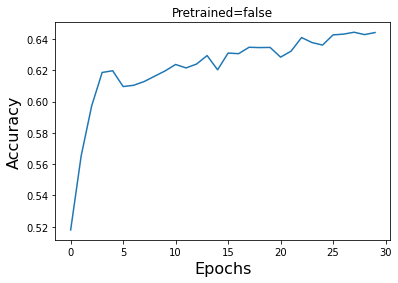

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
plt.plot(epochs,dict1["Pretrained=false"])
plt.title('Pretrained=false')
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.show()

# **Experimenting with differenct learning rates, keeping same number of epochs**

In [ ]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

import pandas as pd;
from scipy.stats import zscore


import numpy as np
import torch as torch;
import torchvision.datasets as datasets
import torchvision.models as models
from torchvision import transforms

import torch.nn as nn;
import torch.nn.functional as F;

np.random.seed(42)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


#read in the dataset, convert to numpy

num_classes=10;

transform = transforms.Compose(
        [transforms.ToTensor(),
         transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                     std=[0.229, 0.224, 0.225])])

full_train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, 
                             transform=transform )
full_test_dataset = datasets.CIFAR10(root='./data', train=False, download=True,
                             transform=transform )

batch_size=64;

trainloader = torch.utils.data.DataLoader(full_train_dataset, batch_size=batch_size,shuffle=True)
testloader = torch.utils.data.DataLoader(full_test_dataset, batch_size=batch_size,shuffle=False)


model = models.resnet18(pretrained=False).to(device)

num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, num_classes).to(device)

#print(model)

criterion = F.nll_loss;
# this optimizer will do gradient descent for us
# experiment with learning rate and optimizer type
learning_rate = 0.001;
# note that we have to add all weights&biases, for both layers, to the optimizer
optimizer = torch.optim.Adam(model.parameters(),lr=learning_rate)

n_epochs = 30;
num_updates = n_epochs*int(np.ceil(len(trainloader.dataset)/batch_size))
print(num_updates)
warmup_steps=200;
def warmup_linear(x):
    if x < warmup_steps:
        lr=x/warmup_steps
    else:
        lr=max( (num_updates - x ) / (num_updates - warmup_steps), 0.)
    return lr;
scheduler = torch.optim.lr_scheduler.LambdaLR(optimizer, warmup_linear);

# experiment with batch size (small batch size needs small learning rate)


for i in range(n_epochs):

    for j, data in enumerate(trainloader):
      
        inputs, labels = data        
        inputs=inputs.to(device);
        labels=labels.to(device);
        
        optimizer.zero_grad();

        outputs = F.log_softmax(model(inputs),dim=1);
        risk = criterion(outputs, labels);
  
        # calculate gradients
        risk.backward();
        
        # take the gradient step
        optimizer.step();
        scheduler.step();
        

        batch_risk=risk.item();
    with (torch.no_grad()):
      correct = 0;
      for j, data in enumerate(testloader):
        
          inputs, labels = data        
          inputs=inputs.to(device);
          labels=labels.to(device);
          outputs = F.log_softmax(model(inputs),dim=1);
          pred = outputs.data.max(dim=1, keepdim=True)[1]
          correct += pred.eq(labels.data.view_as(pred)).sum().item();
    print(i, batch_risk, correct / len(testloader.dataset))

Files already downloaded and verified
Files already downloaded and verified
23460
0 2.045659303665161 0.5797
1 1.3482917547225952 0.6701
2 1.3094173669815063 0.705
3 1.2170335054397583 0.7176
4 0.9040938019752502 0.7358
5 0.6758955717086792 0.7486
6 0.6515539288520813 0.7502
7 0.7652633190155029 0.7468
8 0.10844860970973969 0.7648
9 0.1520434319972992 0.7566
10 0.01912331022322178 0.7548
11 0.07802458852529526 0.7581
12 0.18889297544956207 0.7591
13 0.14107295870780945 0.7606
14 0.32646656036376953 0.7655
15 0.8456361293792725 0.7693
16 0.0007045248057693243 0.7637
17 0.0013334214454516768 0.7648
18 0.34240302443504333 0.7658
19 0.0019558840431272984 0.7648
20 0.012572256848216057 0.7655
21 0.006937181577086449 0.7627
22 0.011541982181370258 0.7682
23 0.0008141968864947557 0.7737
24 0.0052862633019685745 0.7733
25 0.1921260952949524 0.7781
26 0.005299770273268223 0.7741
27 0.014882664196193218 0.7789
28 0.007532223127782345 0.7802
29 0.014769847504794598 0.7794


In [ ]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

import pandas as pd;
from scipy.stats import zscore


import numpy as np
import torch as torch;
import torchvision.datasets as datasets
import torchvision.models as models
from torchvision import transforms

import torch.nn as nn;
import torch.nn.functional as F;

np.random.seed(42)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


#read in the dataset, convert to numpy

num_classes=10;

transform = transforms.Compose(
        [transforms.ToTensor(),
         transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                     std=[0.229, 0.224, 0.225])])

full_train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, 
                             transform=transform )
full_test_dataset = datasets.CIFAR10(root='./data', train=False, download=True,
                             transform=transform )

batch_size=64;

trainloader = torch.utils.data.DataLoader(full_train_dataset, batch_size=batch_size,shuffle=True)
testloader = torch.utils.data.DataLoader(full_test_dataset, batch_size=batch_size,shuffle=False)


model = models.resnet18(pretrained=False).to(device)

num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, num_classes).to(device)

#print(model)

criterion = F.nll_loss;
# this optimizer will do gradient descent for us
# experiment with learning rate and optimizer type
learning_rate = 0.00001;
# note that we have to add all weights&biases, for both layers, to the optimizer
optimizer = torch.optim.Adam(model.parameters(),lr=learning_rate)

n_epochs = 30;
num_updates = n_epochs*int(np.ceil(len(trainloader.dataset)/batch_size))
print(num_updates)
warmup_steps=200;
def warmup_linear(x):
    if x < warmup_steps:
        lr=x/warmup_steps
    else:
        lr=max( (num_updates - x ) / (num_updates - warmup_steps), 0.)
    return lr;
scheduler = torch.optim.lr_scheduler.LambdaLR(optimizer, warmup_linear);

# experiment with batch size (small batch size needs small learning rate)


for i in range(n_epochs):

    for j, data in enumerate(trainloader):
      
        inputs, labels = data        
        inputs=inputs.to(device);
        labels=labels.to(device);
        
        optimizer.zero_grad();

        outputs = F.log_softmax(model(inputs),dim=1);
        risk = criterion(outputs, labels);
  
        # calculate gradients
        risk.backward();
        
        # take the gradient step
        optimizer.step();
        scheduler.step();
        

        batch_risk=risk.item();
    with (torch.no_grad()):
      correct = 0;
      for j, data in enumerate(testloader):
        
          inputs, labels = data        
          inputs=inputs.to(device);
          labels=labels.to(device);
          outputs = F.log_softmax(model(inputs),dim=1);
          pred = outputs.data.max(dim=1, keepdim=True)[1]
          correct += pred.eq(labels.data.view_as(pred)).sum().item();
    print(i, batch_risk, correct / len(testloader.dataset))

Files already downloaded and verified
Files already downloaded and verified
23460
0 2.08471941947937 0.3601
1 1.2753398418426514 0.4245
2 1.1594574451446533 0.4539
3 1.728377103805542 0.4743
4 1.1441528797149658 0.4825
5 1.0528544187545776 0.4936
6 1.1300337314605713 0.4939
7 0.9643568992614746 0.4989
8 1.2713671922683716 0.5002
9 1.2595970630645752 0.4982
10 1.0983366966247559 0.5008
11 0.7515411376953125 0.4985
12 1.1586308479309082 0.4972
13 1.7160917520523071 0.4954
14 1.1687148809432983 0.4941
15 0.8220562934875488 0.4935
16 0.9893468618392944 0.4941
17 1.7670905590057373 0.4919
18 0.8031014204025269 0.4928
19 0.5807982087135315 0.4917
20 0.3874862790107727 0.4917
21 0.841057538986206 0.4916
22 0.6346425414085388 0.4888
23 0.37810200452804565 0.488
24 0.3900045156478882 0.4867
25 0.3123520016670227 0.4886
26 0.8115297555923462 0.4878
27 0.798069953918457 0.4899
28 1.3783353567123413 0.4891
29 0.8776731491088867 0.488


In [ ]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

import pandas as pd;
from scipy.stats import zscore


import numpy as np
import torch as torch;
import torchvision.datasets as datasets
import torchvision.models as models
from torchvision import transforms

import torch.nn as nn;
import torch.nn.functional as F;

np.random.seed(42)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


#read in the dataset, convert to numpy

num_classes=10;

transform = transforms.Compose(
        [transforms.ToTensor(),
         transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                     std=[0.229, 0.224, 0.225])])

full_train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, 
                             transform=transform )
full_test_dataset = datasets.CIFAR10(root='./data', train=False, download=True,
                             transform=transform )

batch_size=64;

trainloader = torch.utils.data.DataLoader(full_train_dataset, batch_size=batch_size,shuffle=True)
testloader = torch.utils.data.DataLoader(full_test_dataset, batch_size=batch_size,shuffle=False)


model = models.resnet18(pretrained=False).to(device)

num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, num_classes).to(device)

#print(model)

criterion = F.nll_loss;
# this optimizer will do gradient descent for us
# experiment with learning rate and optimizer type
learning_rate = 0.01;
# note that we have to add all weights&biases, for both layers, to the optimizer
optimizer = torch.optim.Adam(model.parameters(),lr=learning_rate)

n_epochs = 30;
num_updates = n_epochs*int(np.ceil(len(trainloader.dataset)/batch_size))
print(num_updates)
warmup_steps=200;
def warmup_linear(x):
    if x < warmup_steps:
        lr=x/warmup_steps
    else:
        lr=max( (num_updates - x ) / (num_updates - warmup_steps), 0.)
    return lr;
scheduler = torch.optim.lr_scheduler.LambdaLR(optimizer, warmup_linear);

# experiment with batch size (small batch size needs small learning rate)


for i in range(n_epochs):

    for j, data in enumerate(trainloader):
      
        inputs, labels = data        
        inputs=inputs.to(device);
        labels=labels.to(device);
        
        optimizer.zero_grad();

        outputs = F.log_softmax(model(inputs),dim=1);
        risk = criterion(outputs, labels);
  
        # calculate gradients
        risk.backward();
        
        # take the gradient step
        optimizer.step();
        scheduler.step();
        

        batch_risk=risk.item();
    with (torch.no_grad()):
      correct = 0;
      for j, data in enumerate(testloader):
        
          inputs, labels = data        
          inputs=inputs.to(device);
          labels=labels.to(device);
          outputs = F.log_softmax(model(inputs),dim=1);
          pred = outputs.data.max(dim=1, keepdim=True)[1]
          correct += pred.eq(labels.data.view_as(pred)).sum().item();
    print(i, batch_risk, correct / len(testloader.dataset))

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


23460
0 1.255354881286621 0.5585
1 1.0958696603775024 0.6575
2 1.0051543712615967 0.7005
3 0.5230904221534729 0.711
4 1.1817188262939453 0.7354
5 0.593713641166687 0.7473
6 0.6039725542068481 0.7613
7 0.15476828813552856 0.755
8 0.15871880948543549 0.7498
9 0.33752647042274475 0.7596
10 0.5493019819259644 0.7538
11 0.5089314579963684 0.7626
12 0.7091492414474487 0.7661
13 0.13400426506996155 0.7632
14 0.09974633902311325 0.7651
15 0.05310655012726784 0.7636
16 0.5185564756393433 0.7645
17 0.09078845381736755 0.7654
18 0.0009772321209311485 0.7654
19 0.07706665247678757 0.7711
20 0.22816596925258636 0.7701
21 0.004813328385353088 0.7777
22 0.0005867818254046142 0.7697
23 0.47342872619628906 0.7794
24 0.00025854725390672684 0.7763
25 0.0730767697095871 0.7832
26 0.000238397900830023 0.7826
27 0.001079424750059843 0.7835
28 2.0107436284888536e-05 0.7847
29 0.0008080608095042408 0.783
